In [1]:
##### final check & fig


import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
from copy import copy
import matplotlib.colors as colors

# plt.style.use('tsong')

dirnames = [os.path.abspath('./')+'/DOS/']

labels = {}
ene_data = {}
dos_data = {}

for i, dirname in enumerate(dirnames):
    hcase = os.listdir(dirname)
    for j, folder in enumerate(hcase):
        if folder[0] == '.':
            hcase.remove(folder)
    for j, folder in enumerate(hcase):
        fnames = os.listdir(dirname+'/'+hcase[j])
        
        for j, file in enumerate(fnames):
            if file[0] == '.':
                fnames.remove(file)

        iflag = folder.find('sigma')
        sigma = float(folder[iflag+5:iflag+7])
        
        ene_tmp = [] ; dos_tmp = [] ; label_tmp = []
        
        for ifn, file in enumerate(fnames):
            case = str(folder)
            file_address = dirnames[0]+folder+'/'+file
            iflag = file.find('.dat')
#             print(sigma, file[iflag-2:iflag], file)
            hight = float(file[iflag-2:iflag])
            label_tmp.append([sigma,hight])
        
            f = open(file_address, 'rb')
            ene_data_tmp = [] ; dos_data_tmp = []            
            for line in f.readlines():
                ene_data_tmp.append(float(line.split()[0]))
                dos_data_tmp.append(float(line.split()[1]))
                
            ene_tmp.append(ene_data_tmp)
            dos_tmp.append(dos_data_tmp)
            
        labels[sigma] = label_tmp
        ene_data[sigma] = ene_tmp
        dos_data[sigma] = dos_tmp
        
case = list(labels.keys())
print('reading done')

from scipy import interpolate

ndiv = 10000

ene_new = np.linspace(-0.099, 0.099,  ndiv)

new_dos = {}

for ic in case:
    new_dos_tmp = []
    for i in range(len(labels[ic])):
        f = interpolate.interp1d(ene_data[ic][i], dos_data[ic][i])
        new_dos_tmp.append(f(ene_new))
    new_dos[ic] = new_dos_tmp
    
    

train_set = []
label_set = []

test_set = []
label_set_test = []


for ic in case:
    idx = np.linspace(1, 25, 25, dtype='int')
    np.random.shuffle(idx)
    print('case:', ic)
    print('selected h value:', idx[:13])
    print('                 ', np.sort(idx[:13]))
#     print(idx)
    for i in (idx[:13]):
        train_set.append(np.log(new_dos[ic][i]))
        label_set.append(labels[ic][i])
    for i in (idx[:13]):
        test_set.append(np.log(new_dos[ic][i]))
        label_set_test.append(labels[ic][i])


from sklearn.preprocessing import MinMaxScaler


namp  = 0.1 

train_sample = 200
test_sample = 30

train_data = np.zeros((train_sample*len(train_set), 2, ndiv,1))
train_label = np.zeros((train_sample*len(train_set),2))

test_data = np.zeros((test_sample*len(test_set), 2, ndiv,1))
test_label = np.zeros((test_sample*len(test_set),2))


scaler = MinMaxScaler(feature_range=(0, 1))

for i in range(len(train_set)):
    for j in range(train_sample):
        data_tmp = train_set[i]
        data_tmp = scaler.fit_transform(np.reshape(data_tmp,(-1,1))).T
        data_tmp = data_tmp + namp * np.random.normal(loc=0, scale=1, size=(ndiv))

        train_data[i*train_sample + j,:,:,0] = np.vstack((ene_new,data_tmp))
        train_label[i*train_sample + j] = label_set[i]


for i in range(len(test_set)):
    for j in range(test_sample):
        data_tmp = test_set[i] 
        data_tmp = scaler.fit_transform(np.reshape(data_tmp,(-1,1))).T
        data_tmp = data_tmp + namp * np.random.normal(loc=0, scale=1, size=(ndiv))

        test_data[i*test_sample + j,:,:,0] = np.vstack((ene_new,data_tmp))
        test_label[i*test_sample + j] = label_set_test[i]

print('train, test dataset with labels are prepared')

reading done
case: 20.0
selected h value: [11 20  3 24 19 15 18  1 16 12  6 21  5]
                  [ 1  3  5  6 11 12 15 16 18 19 20 21 24]
case: 25.0
selected h value: [24 19 15  7  1 16 20 23  5 14 11 25  6]
                  [ 1  5  6  7 11 14 15 16 19 20 23 24 25]
case: 30.0
selected h value: [22 13  9  7 17 21 12 24 16 25  8 14  6]
                  [ 6  7  8  9 12 13 14 16 17 21 22 24 25]
train, test dataset with labels are prepared


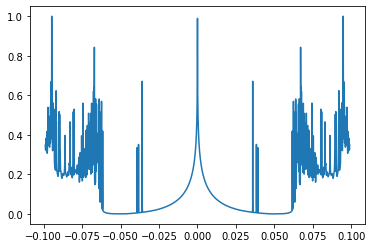

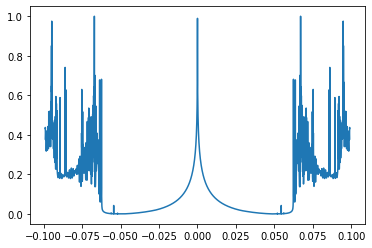

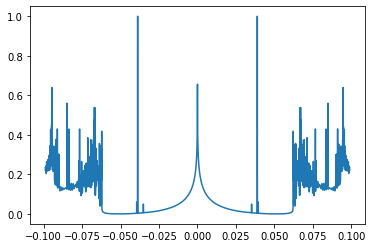

In [2]:
# dara interpolation and normalization

f1file = './dos_for_Fig1.dat'
f2file = './dos1_for_Fig3.dat'
f3file = './dos2_for_Fig3.dat'

f = open(f1file, 'rb')
ef1 = [] ; dos_f1_tmp = []            
for line in f.readlines():
    ef1.append(float(line.split()[0]))
    dos_f1_tmp.append(float(line.split()[1]))

for ic in case:
    new_dos_tmp = []
    for i in range(len(labels[ic])):
        f = interpolate.interp1d(ef1, dos_f1_tmp)
        dos_f1 =  scaler.fit_transform(np.reshape(np.log(f(ene_new)),(-1,1))).T[0]

f = open(f2file, 'rb')
ef1 = [] ; dos_f1_tmp = []            
for line in f.readlines():
    ef1.append(float(line.split()[0]))
    dos_f1_tmp.append(float(line.split()[1]))

for ic in case:
    new_dos_tmp = []
    for i in range(len(labels[ic])):
        f = interpolate.interp1d(ef1, dos_f1_tmp)
        dos_f2 =  scaler.fit_transform(np.reshape(np.log(f(ene_new)),(-1,1))).T[0]


f = open(f3file, 'rb')
ef1 = [] ; dos_f1_tmp = []            
for line in f.readlines():
    ef1.append(float(line.split()[0]))
    dos_f1_tmp.append(float(line.split()[1]))

for ic in case:
    new_dos_tmp = []
    for i in range(len(labels[ic])):
        f = interpolate.interp1d(ef1, dos_f1_tmp)
        dos_f3 =  scaler.fit_transform(np.reshape(np.log(f(ene_new)),(-1,1))).T[0]






plt.plot(ene_new, dos_f1)
plt.show()
plt.plot(ene_new, dos_f2)
plt.show()
plt.plot(ene_new, dos_f3)
plt.show()


In [3]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, Flatten, Conv2D
from keras.layers import BatchNormalization, GlobalAveragePooling2D
from keras.utils import plot_model
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.regularizers import l2, l1_l2
from keras.callbacks import ReduceLROnPlateau

MODEL_SAVE_FOLDER_PATH = os.path.abspath('./') + '/MODEL_SAVE/'
if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
    os.mkdir(MODEL_SAVE_FOLDER_PATH)

model_path = MODEL_SAVE_FOLDER_PATH + '2D_cnn_ndiv_%d_namp_%.1f.hdf5' % (ndiv, namp)

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', mode = 'min',\
                                verbose=1, save_best_only=True)
cb_early_stopping = EarlyStopping(monitor='val_loss', mode = 'min', patience=100)

# Compile model

rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=30, min_lr=0.000001, \
                        verbose=1, min_delta=1e-5)


model = Sequential(name='2D_CNN')

model.add(Input(shape=(2,ndiv,1)))

model.add( Conv2D(filters=8, kernel_size=(2,100), strides=(1,10),  \
                  activation='linear', dilation_rate=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add( Conv2D(filters=32, kernel_size=(2,50), strides=(1,5),  \
                  activation='linear', dilation_rate=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add( Conv2D(filters=128, kernel_size=(2,20), strides=(1,2),  \
                  activation='linear', dilation_rate=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add( Conv2D(filters=256, kernel_size=(2,10), strides=(1,2),  \
                  activation='linear', dilation_rate=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add( Conv2D(filters=512, kernel_size=(2,5), strides=(1,1),  \
                  activation='linear', dilation_rate=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(GlobalAveragePooling2D())
# model.add(Flatten())


model.add(Dense(100, activation='linear'))
model.add(BatchNormalization())
model.add(Activation('selu'))

model.add(Dense(16, activation='linear'))
model.add(BatchNormalization())
model.add(Activation('selu'))

model.add(Dense(8, activation='linear'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(4, activation='linear'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(2, activation='linear'))
model.add(BatchNormalization())
model.add(Activation('selu'))


model.summary()


model.compile(loss='mse', optimizer=SGD(0.01)) # Fit the model
# 
# model.compile(loss='mse', optimizer=Adam(0.005)) # Fit the model

history = model.fit(train_data, train_label, epochs=1000, batch_size=128, verbose=1, \
                   validation_data=(test_data, test_label), \
                   callbacks=[cb_checkpoint, cb_early_stopping, rlr])

plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['val_loss'])
plt.legend()
plt.show()
plt.savefig(MODEL_SAVE_FOLDER_PATH+'learning_namp{0:f}.png'.format(namp),\
            bbox_inches='tight', dpi=900, format='png')


Model: "2D_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 2, 1000, 8)        1608      
_________________________________________________________________
batch_normalization (BatchNo (None, 2, 1000, 8)        32        
_________________________________________________________________
activation (Activation)      (None, 2, 1000, 8)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 200, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 200, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 2, 200, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 100, 128)       16396

KeyboardInterrupt: 

Model: "2D_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 2, 1000, 8)        1608      
_________________________________________________________________
batch_normalization (BatchNo (None, 2, 1000, 8)        32        
_________________________________________________________________
activation (Activation)      (None, 2, 1000, 8)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 200, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 200, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 2, 200, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 100, 128)       16396

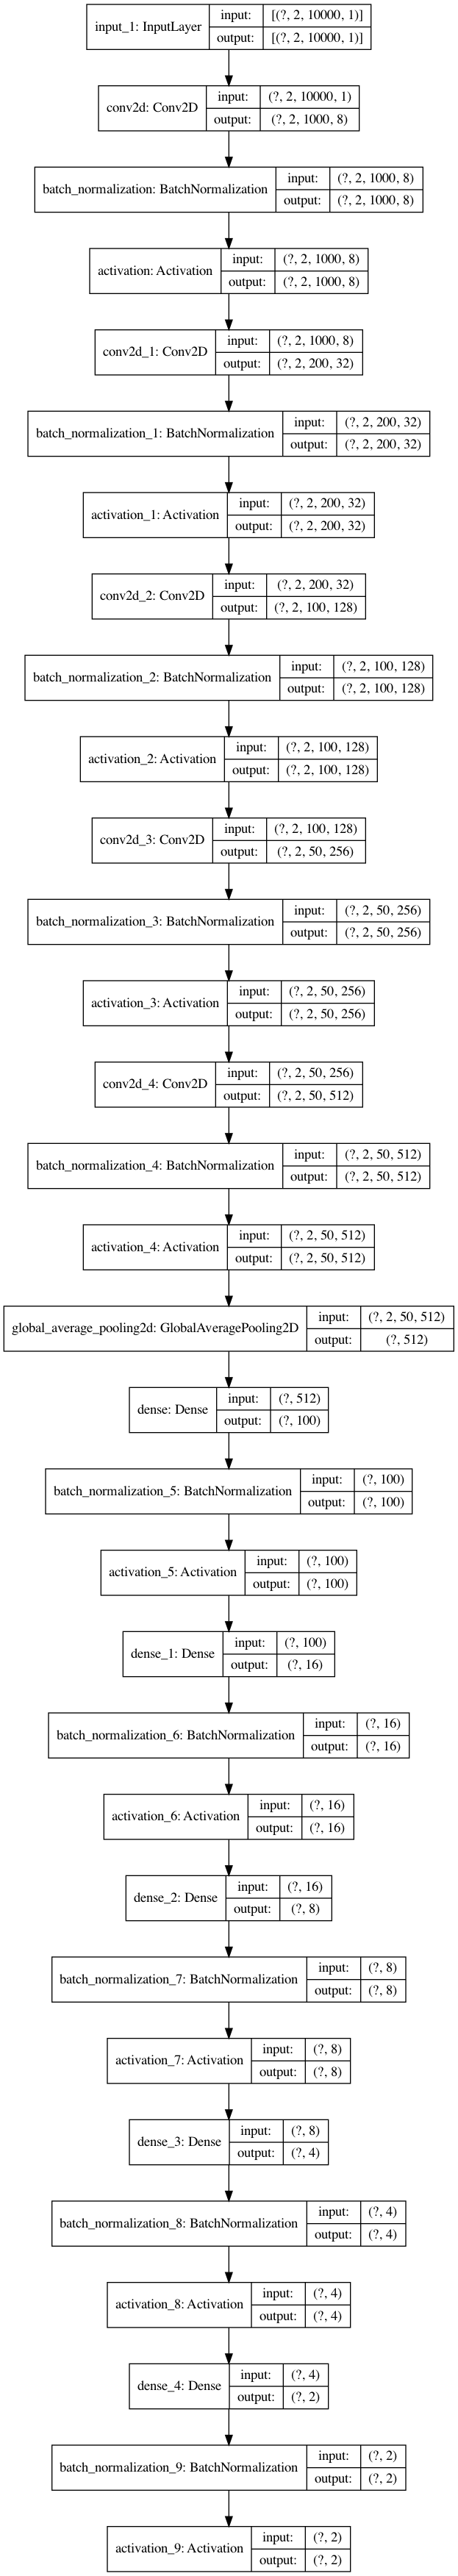

In [4]:
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)